<a href="https://colab.research.google.com/github/Ridhi655/-Fake_News_Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
import csv
import matplotlib.pyplot as plt


In [2]:
#before reading the files, setup the working directory to point to project repo

#test_filename = '/content/test.csv'
#train_filename = '/content/train.csv'
#valid_filename = '/content/valid.csv'



In [3]:
#reading data files 

train_news = pd.read_csv("/content/train.csv",sep='\t', header=None)
test_news = pd.read_csv("/content/test.csv",sep='\t', header=None)
valid_news = pd.read_csv("/content/valid.csv",sep='\t', header=None)


In [4]:

#data observation
def data_obs():
    print("training dataset size:",train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print("test dataset size:",test_news.shape)
    print(test_news.head(10))
    
    print("valid dataset size:",valid_news.shape)
    print(valid_news.head(10))

#check the data by calling below function
data_obs()

training dataset size: (10240, 14)
           0            1                                                  2   \
0   2635.json        false  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        false  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   
5  12465.json         true  The Chicago Bears have had more starting quart...   
6   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
7    153.json    half-true  I'm the only person on this stage who has work...   
8   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
9   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   

                                          3                       4   \
0

In [5]:
'''#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sns.countplot(x='Label', data=dataFile, palette='hls')
    

#by calling below we can see that training, test and valid data seems to be fairly evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)
'''

"#distribution of classes for prediction\ndef create_distribution(dataFile):\n    \n    return sns.countplot(x='Label', data=dataFile, palette='hls')\n    \n\n#by calling below we can see that training, test and valid data seems to be fairly evenly distributed between the classes\ncreate_distribution(train_news)\ncreate_distribution(test_news)\ncreate_distribution(valid_news)\n"

In [6]:
#data integrity check (missing label values)

def data_qualityCheck():
    
    print("Checking data qualitites for training set...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    print("Checking data qualitites for test dataset...")
    test_news.isnull().sum()
    test_news.info()
    
    print("Checking data qualitites for test dataset...")
    valid_news.isnull().sum()
    valid_news.info()

data_qualityCheck()

Checking data qualitites for training set...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10240 non-null  object 
 1   1       10240 non-null  object 
 2   2       10240 non-null  object 
 3   3       10238 non-null  object 
 4   4       10238 non-null  object 
 5   5       7343 non-null   object 
 6   6       8032 non-null   object 
 7   7       10238 non-null  object 
 8   8       10238 non-null  float64
 9   9       10238 non-null  float64
 10  10      10238 non-null  float64
 11  11      10238 non-null  float64
 12  12      10238 non-null  float64
 13  13      10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB
check finished.
Checking data qualitites for test dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype

In [7]:
train_news.columns=['id',
                    'Label',
                    'Statement',
                    'Subject(s)',
                    'Speaker',
                    'Speakers job title',
                    'State info',
                    'Party affiliation',
                    'barely true counts',
                    'false counts',
                    'half true counts',
                    'mostly true counts',
                    'pants on fire counts',
                    'the context (venue / location of the speech or statement)']


In [8]:
train_news= train_news.drop("id", axis = 1)

Removing punctuation (.!<>{}’,”(/)-)

In [9]:
train_news['Statement']

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object

In [10]:
# Replacing punctuations with space
train_news['processed_statement'] = train_news['Statement'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
train_news= train_news[['Statement','processed_statement','Label']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [11]:
train_news['processed_statement']

0        Says the Annies List political group supports ...
1        When did the decline of coal start  It started...
2        Hillary Clinton agrees with John McCain  by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the  At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U S  Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: processed_statement, Length: 10240, dtype: object

Replacing short words

In [12]:
train_news['processed_statement'] = train_news['processed_statement'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [13]:
train_news['processed_statement']

0        Says the Annies List political group supports ...
1        When did the decline coal start started when n...
2        Hillary Clinton agrees with John McCain voting...
3        Health care reform legislation likely mandate ...
4             The economic turnaround started the end term
                               ...                        
10235    There are larger number shark attacks Florida ...
10236    Democrats have now become the party the Atlant...
10237    Says alternative Social Security that operates...
10238    lifting the Cuban embargo and allowing travel ...
10239    The Department Veterans Affairs has manual out...
Name: processed_statement, Length: 10240, dtype: object

LowerCase character

In [14]:
# make entire text lowercase
train_news['processed_statement'] = [review.lower() for review in train_news['processed_statement']]

In [15]:
train_news['processed_statement']

0        says the annies list political group supports ...
1        when did the decline coal start started when n...
2        hillary clinton agrees with john mccain voting...
3        health care reform legislation likely mandate ...
4             the economic turnaround started the end term
                               ...                        
10235    there are larger number shark attacks florida ...
10236    democrats have now become the party the atlant...
10237    says alternative social security that operates...
10238    lifting the cuban embargo and allowing travel ...
10239    the department veterans affairs has manual out...
Name: processed_statement, Length: 10240, dtype: object

Remove stop words and doing lemmatization

In [16]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:



# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

train_news['processed_statement'] = train_news['processed_statement'].apply(lambda x: lemmatize_sentence(x))


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


PLOTTING FREQUENT WORDS

In [19]:
train_news


,Statement,processed_statement,Label
0,Says the Annies List political group supports ...,say the annies list political group support th...,false
1,When did the decline of coal start? It started...,when do the decline coal start start when natu...,half-true
2,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agree with john mccain vote gi...,mostly-true
3,Health care reform legislation is likely to ma...,health care reform legislation likely mandate ...,false
4,The economic turnaround started at the end of ...,the economic turnaround start the end term,half-true
...,...,...,...
10235,There are a larger number of shark attacks in ...,there be large number shark attack florida tha...,mostly-true
10236,Democrats have now become the party of the [At...,democrat have now become the party the atlanta...,mostly-true
10237,Says an alternative to Social Security that op...,say alternative social security that operate g...,half-true
10238,On lifting the U.S. Cuban embargo and allowing...,lift the cuban embargo and allow travel cuba,false


In [20]:
# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
train_news['processed_statement'] = [remove_stopwords(r) for r in train_news['processed_statement']]


In [21]:
train_news['processed_statement']

0        say annies list political group support third ...
1        decline coal start start natural gas take star...
2        hillary clinton agree john mccain vote give ge...
3        health care reform legislation likely mandate ...
4                       economic turnaround start end term
                               ...                        
10235    large number shark attack florida case voter f...
10236       democrat become party atlanta metro area black
10237    say alternative social security operate galves...
10238                 lift cuban embargo allow travel cuba
10239    department veterans affair manual tell veteran...
Name: processed_statement, Length: 10240, dtype: object

In [22]:
from collections import Counter
frequent_words=Counter(" ".join(train_news['processed_statement']).split()).most_common(30)
frequent_words

[('say', 2885),
 ('state', 1415),
 ('year', 1234),
 ('percent', 1191),
 ('tax', 1074),
 ('obama', 748),
 ('000', 736),
 ('job', 653),
 ('president', 647),
 ('million', 639),
 ('vote', 628),
 ('health', 614),
 ('people', 605),
 ('would', 543),
 ('care', 518),
 ('one', 516),
 ('pay', 496),
 ('new', 469),
 ('american', 463),
 ('bill', 462),
 ('get', 455),
 ('time', 451),
 ('billion', 429),
 ('country', 427),
 ('cut', 423),
 ('texas', 393),
 ('plan', 387),
 ('take', 386),
 ('every', 380),
 ('law', 380)]

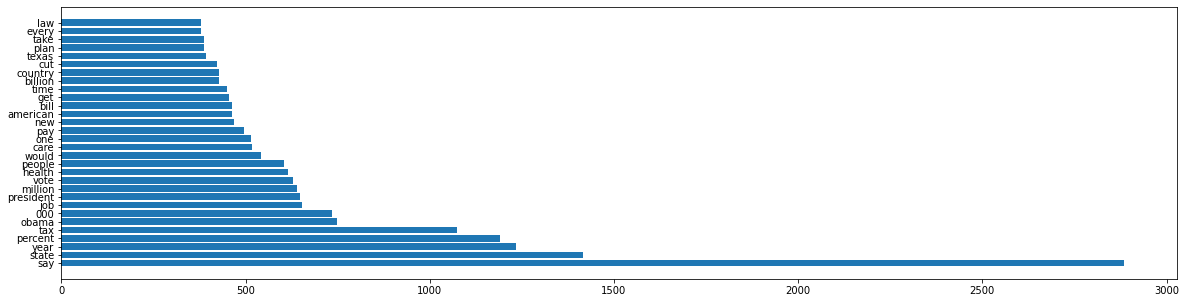

In [23]:
words=[]
count=[]
for i,j in frequent_words:
  words.append(i)
  count.append(j)

plt.figure(figsize=(20,5))
ax = plt.barh(words,count)
plt.show()

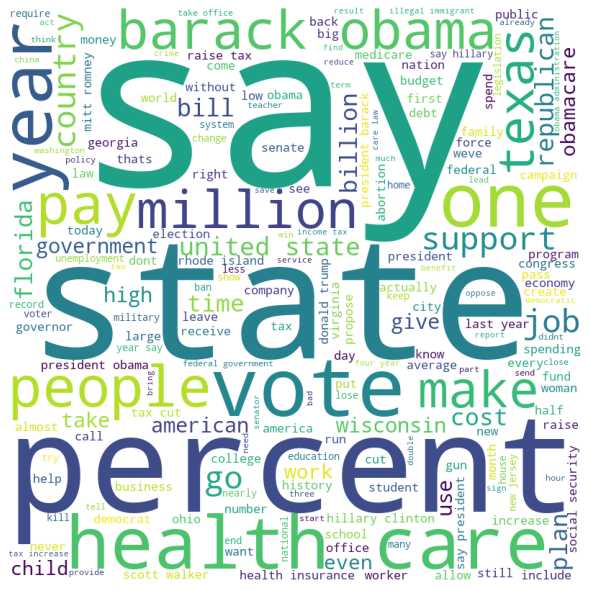

In [24]:
from wordcloud import WordCloud, STOPWORDS


 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in train_news['processed_statement']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

BAG OF WORDS MODEL

Note: before we can train an algorithm to classify fake news labels, we need to extract features from it. It means reducing the mass
of unstructured data into some uniform set of attributes that an algorithm can understand. For fake news detection, it could be 
word counts (bag of words).


In [25]:
'''
from keras.preprocessing.text import Tokenizer
 
text = train_news['processed_statement']
# using tokenizer 
model = Tokenizer()
model.fit_on_texts(text)
 
#print keys 
print(f'Key : {list(model.word_index.keys())}')
 
#create bag of words representation 
rep = model.texts_to_matrix(text, mode='count')
print(rep)
'''

"\nfrom keras.preprocessing.text import Tokenizer\n \ntext = train_news['processed_statement']\n# using tokenizer \nmodel = Tokenizer()\nmodel.fit_on_texts(text)\n \n#print keys \nprint(f'Key : {list(model.word_index.keys())}')\n \n#create bag of words representation \nrep = model.texts_to_matrix(text, mode='count')\nprint(rep)\n"

In [26]:
# train_news['Label']=train_news['Label'].map({'barely-true':0,
# 'false':1,
# 'half-true':2,
# 'mostly-true':3,
# 'pants-fire':4})

In [27]:
#creating feature vector - document term matrix
from sklearn.feature_extraction.text import CountVectorizer
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
X = tfidf.fit_transform(train_news['processed_statement']).toarray()
y = train_news['Label'].values
featureNames = tfidf.get_feature_names()

X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X_train.shape, X_test.shape

((8192, 9424), (2048, 9424))

In [29]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22315789, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:

y_train

array(['half-true', 'mostly-true', 'pants-fire', ..., 'true', 'half-true',
       'mostly-true'], dtype=object)

Building the ML model

Feature Importance

In [31]:
'''new_data = X_train[~np.isnan(X_train)]
new_data
'''

'new_data = X_train[~np.isnan(X_train)]\nnew_data\n'

In [32]:
'''np.any(np.isnan(X_train))
np.all(np.isfinite(X_train))
'''
#.fillna(0, inplace=True)

'np.any(np.isnan(X_train))\nnp.all(np.isfinite(X_train))\n'

In [33]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities

pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
'''

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsClassifier\n\n# logistic regression\nmodel1 = LogisticRegression()\n# knn\nmodel2 = KNeighborsClassifier(n_neighbors=4)\n\n# fit model\nmodel1.fit(X_train, y_train)\nmodel2.fit(X_train, y_train)\n\n# predict probabilities\n\npred_prob1 = model1.predict_proba(X_test)\npred_prob2 = model2.predict_proba(X_test)\n'

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [35]:
y_pred

array(['barely-true', 'half-true', 'pants-fire', ..., 'mostly-true',
       'mostly-true', 'true'], dtype=object)

In [36]:
'''from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
'''


'from sklearn.metrics import roc_curve\n\n# roc curve for models\nfpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)\nfpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)\n\n# roc curve for tpr = fpr \nrandom_probs = [0 for i in range(len(y_test))]\np_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)\n'

In [37]:

y_pred

array(['barely-true', 'half-true', 'pants-fire', ..., 'mostly-true',
       'mostly-true', 'true'], dtype=object)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 64  64  60  55  12  54]
 [ 69  86  85  67  20  57]
 [ 62  88 105  82  19  79]
 [ 63  86  71 105  20  68]
 [ 34  42  33  23  26  24]
 [ 35  66  78  63  17  66]]
The model accuracy is 0.220703125


In [39]:
cm.shape

(6, 6)

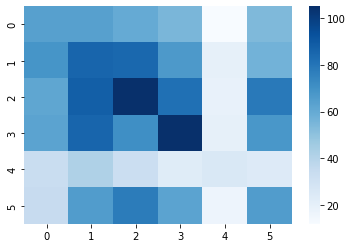

In [40]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, fmt="", cmap='Blues')

In [42]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

In [43]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
830,0.032791,say
892,0.017786,state
699,0.011915,percent
1026,0.011488,year
919,0.009512,tax
...,...,...
111,0.000119,attract
220,0.000113,coggs
250,0.000099,wasnt
227,0.000089,within
